### Task 2: Predicting the students perfromance based on various features.
In this task we are predicting the student's performance based on features like:<br>
1. `school`: Whether the school is urban or rural
2. `age`: Age of the student
3. `Pstatus`: Parental status of the student where `A` is away and `T` is together.
4. `traveltime`: The travel time for the students where `1` is very short amount of time, `2` is short, `3` is long, `4` is very long.
5. `studytime`: The amount of time students study outside of school in hours.
6. `failures`: The amount of subjects they have failed in their schoool.
7. `G1, G2, G3`: The grades scored in their test series. 
8. `Mjob`: Job of Mother
9. `Fjob`: Job of Father
10. `activities`: Whether student is involved in extra-curricular activites
11. `Grades`: Mean of scores of G1, G2, G3. 

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading and cleaning

In [139]:
df = pd.read_csv(r'C:\Users\Atharva Tawde\Desktop\ignite projects\task 2\student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [141]:
df1 = df[['school','age','Pstatus','traveltime','studytime','failures','G1','G2','G3','absences','activities','Mjob','Fjob']]
df1['Grades'] = round(df1[['G1','G2','G3']].mean(axis=1))
df1.head()

,school,age,Pstatus,traveltime,studytime,failures,G1,G2,G3,absences,activities,Mjob,Fjob,Grades
0,GP,18,A,2,2,0,5,6,6,6,no,at_home,teacher,6.0
1,GP,17,T,1,2,0,5,5,6,4,no,at_home,other,5.0
2,GP,15,T,1,2,3,7,8,10,10,no,at_home,other,8.0
3,GP,15,T,1,3,0,15,14,15,2,yes,health,services,15.0
4,GP,16,T,1,2,0,6,10,10,4,no,other,other,9.0


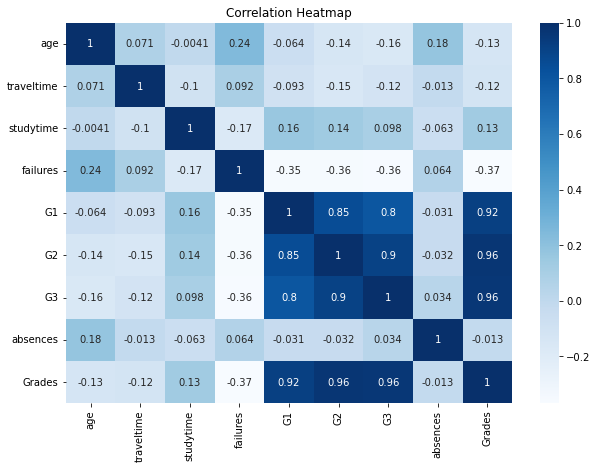

In [142]:
# plotting a heatmap to find the correlation between variables
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True,ax=ax,cmap='Blues')
ax.set_title('Correlation Heatmap');

In [143]:
print('The number of missing values are',df1.isna().sum().sum())
print('The number of duplicated rows are',df1.duplicated().sum())
print('The number of rows before removing the duplicates are',df1.shape[0])
df_final = df1.drop_duplicates()
print('The number of rows after removing the duplicates are',df_final.shape[0])

The number of missing values are 0
The number of duplicated rows are 0
The number of rows before removing the duplicates are 395
The number of rows after removing the duplicates are 395


### Pre-processing of data

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final['Pstatus'] = le.fit_transform(df_final['Pstatus'])
df_final['activities'] = le.fit_transform(df_final['activities'])
df_final['school'] = le.fit_transform(df_final['school'])
df_final['Mjob'] = le.fit_transform(df_final['Mjob'])
df_final['Fjob'] = le.fit_transform(df_final['Fjob'])

In [148]:
df_final.head()

,school,age,Pstatus,traveltime,studytime,failures,G1,G2,G3,absences,activities,Mjob,Fjob,Grades
0,0,18,0,2,2,0,5,6,6,6,0,0,4,6.0
1,0,17,1,1,2,0,5,5,6,4,0,0,2,5.0
2,0,15,1,1,2,3,7,8,10,10,0,0,2,8.0
3,0,15,1,1,3,0,15,14,15,2,1,1,3,15.0
4,0,16,1,1,2,0,6,10,10,4,0,2,2,9.0


### Splitting the data into train and test

In [145]:
X = df_final.drop(['Grades'],axis=1)
y = df_final['Grades']

# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 13), (79, 13))

### Testing the regression models

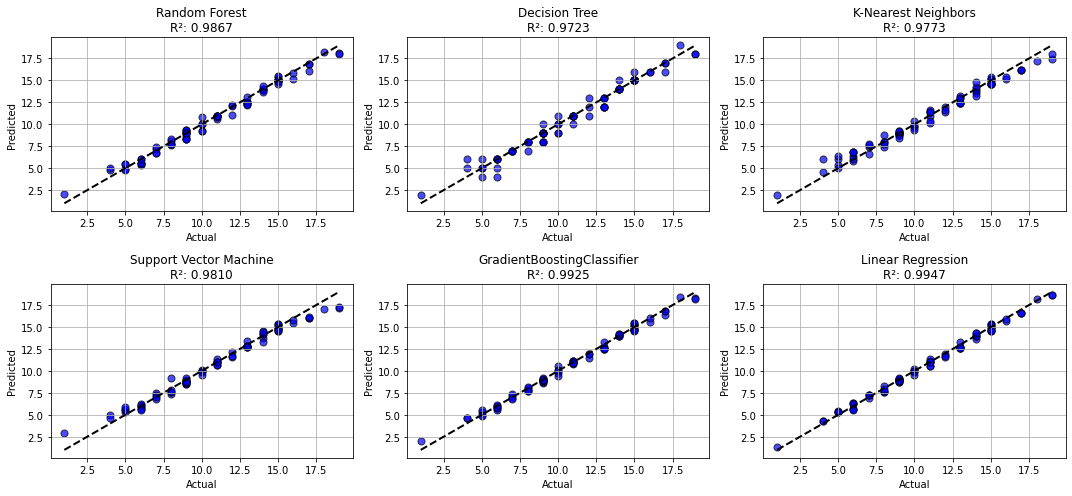

In [156]:
# to test regression models
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

model_predictions = {}
model_scores = {}
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "GradientBoostingClassifier": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# to check the accuracy of the models
for name, model in models.items():
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred
    model_scores[name] = r2_score(y_test, y_pred)

plt.figure(figsize=(15, 7))

for i, (name, y_pred) in enumerate(model_predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}\nR²: {model_scores[name]:.4f}')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusion
Hence we can conclude that `LinearRegression()` model is a good predictor of the variables in the given dataset and can conclude that the aforementioned variables in the dataset greatly affect the students grades. Schools can take various measures to ensure a student's grades to not decrease by having counseling sessions for an individual student and alert the parents if the student is troubled by any issues; financially or emotionally.